# Notebook demo

Jupyter notebooks contain Python code that can be run one cell at a time. Output is saved, but to re-run code in a later work session, you need to start from the beginning.

This demo loads home price data, explores it, and builds some simple model components.

In [32]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Download some home price data for the San Francisco Bay Area

In [3]:
files = [
    'https://www.dropbox.com/s/1n370e0cxlh50fc/ARB_HIST_ALAMEDA_v3.zip?dl=1',
    'https://www.dropbox.com/s/6owx081opq4dbfu/ARB_HIST_CONTRA_COSTA_v3.zip?dl=1',
    'https://www.dropbox.com/s/u7gc5hotzeddu8k/ARB_HIST_MARIN_v3.zip?dl=1',
    'https://www.dropbox.com/s/2shn4eyxn6yx12u/ARB_HIST_NAPA_v3.zip?dl=1',
    'https://www.dropbox.com/s/hp3eyabjiy8andw/ARB_HIST_SAN_FRANCISCO_v3.zip?dl=1',
    'https://www.dropbox.com/s/f9qg8z7ucon7htm/ARB_HIST_SAN_MATEO_v3.zip?dl=1',
    'https://www.dropbox.com/s/iqef06jgn13g747/ARB_HIST_SANTA_CLARA_v3.zip?dl=1',
    'https://www.dropbox.com/s/8nc4gj3t34zcrbg/ARB_HIST_SOLANO_v3.zip?dl=1',
    'https://www.dropbox.com/s/g1vw02o3nfh5iz1/ARB_HIST_SONOMA_v3.zip?dl=1'
]

In [4]:
%%time
df = pd.concat([pd.read_csv(url, compression='zip', low_memory=False) for url in files])

CPU times: user 1min 17s, sys: 9.54 s, total: 1min 27s
Wall time: 1min 44s


In [5]:
print(len(df))  # row count
print(len(df.columns))  # column.count

2147507
97


In [9]:
# Drop columns we won't be using

df = df[['sr_date_transfer', 'use_code_std', 'sa_sqft', 'sa_x_coord', 'sa_y_coord',
         'ucb_price_sqft', 'ucb_price_sqft_adj', 'mm_muni_name']]

### Explore the data

In [12]:
df.head()

,sr_date_transfer,use_code_std,sa_sqft,sa_x_coord,sa_y_coord,ucb_price_sqft,ucb_price_sqft_adj,mm_muni_name
0,19880104,RSFR,1047,122.088274,37.641319,112,206,ALAMEDA
1,19880104,RMFD,11880,122.268809,37.879121,37,68,ALAMEDA
2,19880104,RSFR,2584,122.250448,37.862069,152,281,ALAMEDA
3,19880104,RCON,1383,122.030843,37.536760,90,167,ALAMEDA
4,19880104,RSFR,3499,121.916797,37.504846,56,104,ALAMEDA


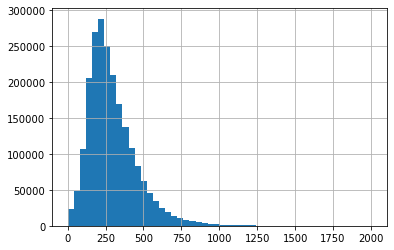

In [6]:
df.ucb_price_sqft_adj.hist(bins=50)

(0, 500)

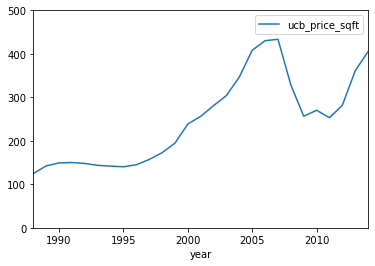

In [27]:
df['year'] = df.sr_date_transfer//10000
df[['ucb_price_sqft', 'year']].groupby('year').mean().plot.line().set_ylim(0, 500)

### Make a map

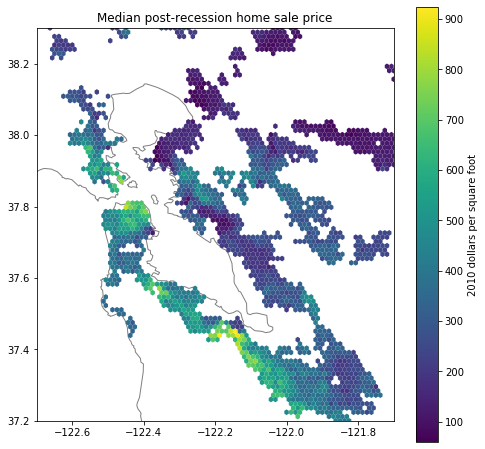

In [42]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_aspect(1.1)
ax.set_xlim((-122.7, -121.7))
ax.set_ylim((37.2, 38.3))
ax.set_title("Median post-recession home sale price")

coastline = gpd.read_file('https://www.dropbox.com/s/u5xpcpj9hf5g7re/cb_2016_us_state_500k.zip?dl=1')
coastline.plot(ax=ax, color='white', edgecolor='grey', zorder=1)

data = df.loc[df.year > 2008]
values = data.ucb_price_sqft_adj
hb = ax.hexbin(data.sa_x_coord*-1, data.sa_y_coord, C=values, 
               reduce_C_function=np.median, extent=(-121.7, -122.7, 37.2, 38.3), 
               mincnt=25, gridsize=80, linewidths=0, cmap='viridis', zorder=2)

cb = fig.colorbar(hb, ax=ax)
cb.set_label('2010 dollars per square foot')

plt.show()